# Tests for quering local PBF osm files

guide for using the filter https://pypi.org/project/esy-osmfilter/


## imports

In [3]:
import configparser, contextlib
import os, sys

from esy.osmfilter import osm_colors as CC
from esy.osmfilter import run_filter 
from esy.osmfilter import Node, Way, Relation

import urllib.request


## Get file

In [4]:
c = 'liechtenstein-latest'
city_name = 'berlin-latest'

In [5]:
PBF_inputfile = os.path.join(os.getcwd(), f'test-osmfilter/{city_name}.osm.pbf')
JSON_outputfile = os.path.join(os.getcwd(), f'test-osmfilter/{city_name}.json')

In [6]:
PBF_inputfile

'/home/laia/code/Laiagdla/livablestreets/notebooks/test-osmfilter/berlin-latest.osm.pbf'

In [7]:
if not os.path.exists(f'test-osmfilter/{city_name}.osm.pbf'):
    filename, headers = urllib.request.urlretrieve(
        f'https://download.geofabrik.de/europe/{city_name}.osm.pbf',
        filename=f'test-osmfilter/{city_name}.osm.pbf')
# PBF_inputfile = filename

## Filter main data

In [8]:
prefilter   = {Node: {}, Way: {"man_made":["pipeline",],}, Relation: {}}
blackfilter = [("pipeline","substation"),]
whitefilter = [(('man_made','pipeline'),('waterway','drain')),] #[(("waterway","drain"),("name","Wäschgräble")), ]

In [9]:
>>> [Data,_]=run_filter('noname',
...                     PBF_inputfile, 
...                     JSON_outputfile, 
...                     prefilter,
...                     whitefilter, 
...                     blackfilter, 
...                     NewPreFilterData=True, 
...                     CreateElements=False, 
...                     LoadElements=False,
...                     verbose=True)

INFO:esy.osmfilter.pre_filter:PreFilter OSM GAS DATA
INFO:esy.osmfilter.pre_filter:InputFile     : /home/laia/code/Laiagdla/livablestreets/notebooks/test-osmfilter/berlin-latest.osm.pbf
INFO:esy.osmfilter.pre_filter:Size          : 69960           kbyte
INFO:esy.osmfilter.pre_filter:Estimated Time: 9.99            s
INFO:esy.osmfilter.pre_filter:=============================
INFO:esy.osmfilter.pre_filter:0.5
INFO:esy.osmfilter.pre_filter:1
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osm

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

In [10]:
>>> len(Data['Node'])

2383

In [11]:
>>> len(Data['Relation'])

0

In [12]:
>>> len(Data['Way'])

363

In [142]:
Data['Way']

{'46796846': {'id': 46796846,
  'tags': {'location': 'underground',
   'man_made': 'pipeline',
   'name': 'Wäschgräbli',
   'waterway': 'drain'},
  'refs': [275133472, 597910238, 597910239]},
 '46796872': {'id': 46796872,
  'tags': {'layer': '-1',
   'location': 'underground',
   'man_made': 'pipeline',
   'name': 'Wäschgräble',
   'waterway': 'drain'},
  'refs': [597910240,
   597910249,
   597910250,
   597910251,
   597910252,
   597910253,
   4781273464,
   597910254,
   599012412,
   597757327]},
 '1031290326': {'id': 1031290326,
  'tags': {'layer': '-1',
   'location': 'underground',
   'man_made': 'pipeline',
   'operator': 'Liechtensteinische Kraftwerke',
   'substance': 'water'},
  'refs': [9505035225,
   9505025758,
   9505035231,
   9505035232,
   9505035233,
   9505035234,
   9505035235,
   9505035236,
   9505035237,
   9505035238,
   9505035239,
   9505035240,
   9505035241,
   9505035242,
   9505035243,
   9505035244,
   9505035245,
   9505035246,
   9505035247,
   950503

## Filter out (blackfilter)

In [143]:
>>> [_,Elements]=run_filter('funny-waterway-pipelines',
...                            PBF_inputfile, 
...                            JSON_outputfile, 
...                            prefilter,
...                            whitefilter, 
...                            blackfilter, 
...                            NewPreFilterData=False, 
...                            CreateElements=True, 
...                            LoadElements=False,
...                            verbose=True)
>>> len(Elements['funny-waterway-pipelines'])
0
>>> len(Elements['funny-waterway-pipelines']['Relation'])
0
>>> len(Elements['funny-waterway-pipelines']['Way'])

2

In [144]:
Elements

{'funny-waterway-pipelines': {'Node': {},
  'Way': {'46796872': {'id': 46796872,
    'tags': {'layer': '-1',
     'location': 'underground',
     'man_made': 'pipeline',
     'name': 'Wäschgräble',
     'waterway': 'drain'},
    'refs': [597910240,
     597910249,
     597910250,
     597910251,
     597910252,
     597910253,
     4781273464,
     597910254,
     599012412,
     597757327]},
   '46796846': {'id': 46796846,
    'tags': {'location': 'underground',
     'man_made': 'pipeline',
     'name': 'Wäschgräbli',
     'waterway': 'drain'},
    'refs': [275133472, 597910238, 597910239]}},
  'Relation': {}}}

## save geojson

In [16]:
>>> from esy.osmfilter import export_geojson

# jsontype='Line' 'Point' 

>>> export_geojson(Elements['funny-waterway-pipelines']['Way'],Data,
... filename=f'test-osmfilter/{city_name}.geojson',jsontype='Line')

NameError: name 'Elements' is not defined

## open geosjon

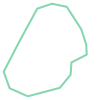

In [19]:
import geopandas as gpd
elements = gpd.read_file(f'test-osmfilter/{city_name}.geojson')
elements['geometry'][0]

In [130]:
elements.describe()

,access,amenity,area,area:highway,bicycle,bicycle:conditional,bicycle:lanes,bicycle_road,bridge,bridge:name,...,was:highway,was:maxspeed,website,wheelchair,width,width:carriageway,wikidata,wikimedia_commons,wikipedia,geometry
count,42,2,170,1,926,44,2,6,32,11,...,6,6,1,22,661,2,93,20,51,2785
unique,8,2,1,1,8,4,2,1,1,4,...,1,1,1,2,27,2,44,8,18,2785
top,private,marketplace,yes,cycleway,yes,yes @ (Mo-Sa 19:00-9:00;Su 00:00-24:00),designated|designated,yes,yes,Hatun-Sürücü-Brücke,...,secondary,50,https://www.gorkistrasse.de/vision-entstehung,yes,2,5,Q2582380,Category:Großer Stern (Berlin-Tiergarten),de:Wilmersdorfer Straße,LINESTRING (13.305831700000063 52.509850500000...
freq,21,1,170,1,578,34,1,6,32,6,...,6,6,1,21,124,1,18,11,18,1


# shapely, create geometry from geojson

In [23]:
import shapely.geometry as geometry
from shapely.ops import linemerge, unary_union, polygonize

# test

In [105]:
green = {'landuse':['grass','forest','orchard','allotments','cementery','flowerbed', 'meadow','greenfield', 'recreation_ground','village_green'],
         'leisure':['park','playground','garden'],
         'natural':['heath','shrubbery','wood','grassland'],}
amenit = {'amenity':['bbq'],}

cycle = {'highway':['pedestrian','cycleway']}


prefilter   = {Node: {}, Way: cycle, Relation: {}}


[Data,_]=run_filter('noname',
                    PBF_inputfile, 
                    JSON_outputfile, 
                    prefilter,
                    whitefilter, 
                    blackfilter, 
                    NewPreFilterData=True, 
                    CreateElements=True, 
                    LoadElements=False,
                    verbose=True)

INFO:esy.osmfilter.pre_filter:PreFilter OSM GAS DATA
INFO:esy.osmfilter.pre_filter:InputFile     : /home/laia/code/Laiagdla/livablestreets/notebooks/test-osmfilter/berlin-latest.osm.pbf
INFO:esy.osmfilter.pre_filter:Size          : 69960           kbyte
INFO:esy.osmfilter.pre_filter:Estimated Time: 9.99            s
INFO:esy.osmfilter.pre_filter:=============================
INFO:esy.osmfilter.pre_filter:0.5
INFO:esy.osmfilter.pre_filter:1
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osm

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfilter.pre_filter:1.2
INFO:esy.osmfi

In [106]:
ways = len(Data['Way'])
rels = len(Data['Relation'])
nodes = len(Data['Node'])
           
print(f"{ways} Ways")
print(f"{rels} Rels")
print(f"{nodes} Nodes")

2789 Ways
0 Rels
17027 Nodes


In [107]:
Data['Way']

{'4471285': {'id': 4471285,
  'tags': {'bicycle': 'permissive',
   'bicycle:conditional': 'no @ (Mo-Sa 08:00-21:00)',
   'highway': 'pedestrian',
   'lit': 'yes',
   'name': 'Wilmersdorfer Straße',
   'name:etymology:wikidata': 'Q693628',
   'postal_code': '10627',
   'surface': 'paving_stones',
   'wikidata': 'Q2582380',
   'wikipedia': 'de:Wilmersdorfer Straße'},
  'refs': [6965000733,
   4567356184,
   26736198,
   4567356185,
   26736179,
   6473626915,
   4589305174,
   4404288521,
   4589306065,
   26736181]},
 '4475759': {'id': 4475759,
  'tags': {'bicycle': 'designated',
   'foot': 'designated',
   'highway': 'pedestrian',
   'lit': 'yes',
   'name': 'Mehringplatz',
   'name:etymology:wikidata': 'Q18806',
   'segregated': 'no',
   'surface': 'paving_stones',
   'traffic_sign': 'DE:240',
   'wikipedia': 'de:Mehringplatz'},
  'refs': [26872078,
   162390371,
   907454643,
   26872079,
   907454657,
   162390368,
   907454661,
   162390406,
   907454621,
   26872071,
   907454641,

In [108]:
# jsontype='Line' 'Point' 

export_geojson(Data['Way'],Data,
filename=f'test-osmfilter/{city_name}.geojson',jsontype='Line')

## Create Shapely geomtry

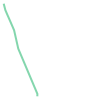

In [111]:
elements = gpd.read_file(f'test-osmfilter/{city_name}.geojson')
elements['geometry'][3]

In [112]:
polygonize(elements['geometry'][1])

<generator object CollectionOperator.polygonize at 0x7fc546e7c890>

In [113]:
lis = []
for l in elements['geometry']:
    lis.append(l)

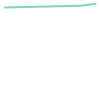

In [114]:
lis[2]

In [115]:
type(lis[2])

shapely.geometry.linestring.LineString

In [116]:
# converting to points

lis_p = geometry.MultiPoint(lis)


TypeError: 'LineString' object is not iterable

In [121]:
merged = linemerge([*lis])  # merge LineStrings
borders = unary_union(merged)  # linestrings to a MultiLineString
lines = geometry.MultiLineString(borders)

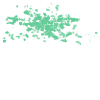

In [122]:
lines

In [ ]:
merged = linemerge([*lis])  # merge LineStrings
borders = unary_union(merged)  # linestrings to a MultiLineString
polygons = list(polygonize(borders))
parks = geometry.MultiPolygon(polygons)

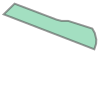

In [96]:
parks.geoms[3]

In [97]:
type(parks)

shapely.geometry.multipolygon.MultiPolygon

## Create Geojson

In [ ]:
import folium
from shapely.geometry import mapping


In [123]:
mapping(lines)

{'type': 'MultiLineString',
 'coordinates': (((13.124204699999916, 52.41057210000024),
   (13.124100999999959, 52.4109790999998),
   (13.124119799999958, 52.4110199999998),
   (13.124173399999957, 52.4110477999998),
   (13.124579799999957, 52.4112482999998),
   (13.124771599999956, 52.4113381999998),
   (13.125029099999956, 52.4114600999998),
   (13.125231599999957, 52.411553399999804),
   (13.125454199999957, 52.4116286999998),
   (13.125698299999957, 52.4116965999998),
   (13.125919499999958, 52.4117349999998),
   (13.126189099999957, 52.4117578999998),
   (13.126690699999957, 52.4117823999998),
   (13.126944199999956, 52.4117930999998),
   (13.127337099999956, 52.4118691999998),
   (13.127535599999955, 52.4119280999998),
   (13.127864199999955, 52.4120523999998),
   (13.128253099999956, 52.4121554999998),
   (13.128711699999956, 52.412244599999795),
   (13.128950399999956, 52.4122495999998),
   (13.129354599999957, 52.412255499999794),
   (13.130009899999957, 52.412251999999796),
  

## example map in folium

In [126]:
map_test = folium.Map(width=750,height=500,tiles="openstreetmap",   zoom_start=15)
folium.GeoJson(mapping(lines)).add_to(map_test)

In [127]:
map_test